<a href="https://colab.research.google.com/github/hieucoding123/HieuPham/blob/main/SUPERMARKET_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style='darkgrid')

## Tải và chỉnh lại

In [ ]:
sales =pd.read_csv('/content/drive/MyDrive/Datasets/supermarket_sales - Sheet1.csv')
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3




*   cogs: giá vốn bán hàng
*   gross income: tổng thu



In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
sales.sort_values(by=['Date','Time'],inplace=True)

In [ ]:
sales.rename(columns={'gross margin percentage':'gross margin(%)'},inplace=True)    # đổi tên cột
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin(%),gross income,Rating
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,1/1/2019,11:36,Credit card,846.30,4.761905,42.315,9.0
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,1/1/2019,11:40,Ewallet,175.32,4.761905,8.766,5.0
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,1/1/2019,11:43,Cash,125.74,4.761905,6.287,5.0
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7


In [ ]:
sales['DateTime']=sales['Date']+' '+sales['Time']
sales['DateTime']=pd.to_datetime(sales['DateTime'])
sales.drop(['Date','Time'],axis=1,inplace=True)
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 326
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Invoice ID       1000 non-null   object        
 1   Branch           1000 non-null   object        
 2   City             1000 non-null   object        
 3   Customer type    1000 non-null   object        
 4   Gender           1000 non-null   object        
 5   Product line     1000 non-null   object        
 6   Unit price       1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Tax 5%           1000 non-null   float64       
 9   Total            1000 non-null   float64       
 10  Payment          1000 non-null   object        
 11  cogs             1000 non-null   float64       
 12  gross margin(%)  1000 non-null   float64       
 13  gross income     1000 non-null   float64       
 14  Rating           1000 non-null   float64

In [ ]:
sales['hour']=sales['DateTime'].dt.hour
sales['month']=sales['DateTime'].dt.month
sales['date']=sales['DateTime'].dt.day
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 17 to 326
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Invoice ID       1000 non-null   object        
 1   Branch           1000 non-null   object        
 2   City             1000 non-null   object        
 3   Customer type    1000 non-null   object        
 4   Gender           1000 non-null   object        
 5   Product line     1000 non-null   object        
 6   Unit price       1000 non-null   float64       
 7   Quantity         1000 non-null   int64         
 8   Tax 5%           1000 non-null   float64       
 9   Total            1000 non-null   float64       
 10  Payment          1000 non-null   object        
 11  cogs             1000 non-null   float64       
 12  gross margin(%)  1000 non-null   float64       
 13  gross income     1000 non-null   float64       
 14  Rating           1000 non-null   float64

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin(%),gross income,Rating,DateTime,hour,month,date
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,Credit card,435.66,4.761905,21.783,6.9,2019-01-01 10:39:00,10,1,1
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,Credit card,846.30,4.761905,42.315,9.0,2019-01-01 11:36:00,11,1,1
839,271-77-8740,C,Naypyitaw,Member,Female,Sports and travel,29.22,6,8.766,184.086,Ewallet,175.32,4.761905,8.766,5.0,2019-01-01 11:40:00,11,1,1
523,133-14-7229,C,Naypyitaw,Normal,Male,Health and beauty,62.87,2,6.287,132.027,Cash,125.74,4.761905,6.287,5.0,2019-01-01 11:43:00,11,1,1
567,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,Cash,591.66,4.761905,29.583,7.7,2019-01-01 13:55:00,13,1,1


## Tổng quan các giá trị

In [ ]:
object_list=[x for x in sales.columns if sales[x].dtype=='object']

In [ ]:
object_list

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [ ]:
for i in object_list:
    print(f'Column {i}:',str(len(sales[i].unique())),' unique values')

Column Invoice ID: 1000  unique values
Column Branch: 3  unique values
Column City: 3  unique values
Column Customer type: 2  unique values
Column Gender: 2  unique values
Column Product line: 6  unique values
Column Payment: 3  unique values


In [ ]:
print('Column hour:',str(len(sales['hour'].unique())),' hours')
print('Column month:',str(len(sales['month'].unique())),' months')
print('Column date:',str(len(sales['date'].unique())),'date')

Column hour: 11  hours
Column month: 3  months
Column date: 31 date


In [ ]:
sales['price/product']=sales['Unit price']/sales['Quantity']


In [ ]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin(%),gross income,Rating,hour,month,date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270,14.910000,1.993000,15.256000
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858,3.186857,0.835254,8.693563
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000,10.000000,1.000000,1.000000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000,12.000000,1.000000,8.000000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000,15.000000,2.000000,15.000000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000,18.000000,3.000000,23.000000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000,20.000000,3.000000,31.000000



## Tìm hiểu về sản phẩm

In [ ]:
sns.set(style='darkgrid')

Text(0.5, 0.98, 'Product line and Quantity, Rating')

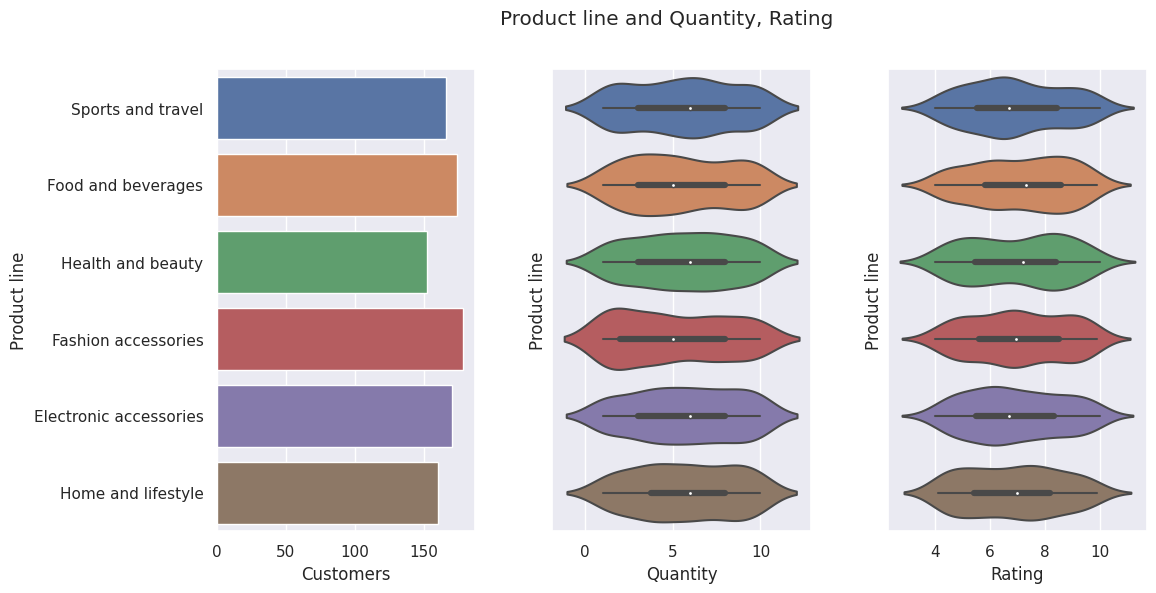

In [ ]:
fig,ax2 = plt.subplots(1,3,figsize=(12,6),sharey=True)
fig.subplots_adjust(wspace=0.3)

sns.countplot(sales,y='Product line',ax=ax2[0]).set(xlabel='Customers')
sns.violinplot(sales,x='Quantity',y='Product line',ax=ax2[1]).set(xlabel='Quantity')
sns.violinplot(sales,x='Rating',y='Product line',ax=ax2[2]).set(xlabel='Rating')

plt.suptitle('Product line and Quantity, Rating')

In [ ]:

most_exp=sales.sort_values(by='price/product',ascending=False)[['Product line','price/product','Payment']][:10].style.background_gradient(cmap='YlOrRd')
most_exp

,Product line,price/product,Payment
656,Electronic accessories,99.690000,Credit card
469,Electronic accessories,98.840000,Cash
498,Sports and travel,98.130000,Cash
537,Home and lifestyle,97.940000,Ewallet
95,Electronic accessories,97.160000,Ewallet
415,Health and beauty,96.110000,Ewallet
813,Electronic accessories,95.150000,Cash
777,Sports and travel,93.380000,Cash
798,Health and beauty,92.780000,Credit card
960,Fashion accessories,91.980000,Cash


In [ ]:
most_che=sales.sort_values(by='price/product',ascending=False)[['Product line','price/product','Payment']][-10:].style.background_gradient(cmap='BuGn')
most_che

,Product line,price/product,Payment
944,Health and beauty,1.440000,Cash
368,Sports and travel,1.436000,Cash
748,Home and lifestyle,1.365556,Credit card
349,Health and beauty,1.350000,Credit card
810,Health and beauty,1.343750,Ewallet
830,Electronic accessories,1.320000,Cash
881,Fashion accessories,1.272500,Credit card
862,Home and lifestyle,1.253333,Credit card
493,Home and lifestyle,1.212000,Credit card
118,Food and beverages,1.096000,Ewallet


## Để ý đến Khách hàng


Liên quan đến khách hàng
*   Giới tính
*   Phương thức thanh toán
*   Xếp hạng



In [ ]:
print('Trung bình mỗi khách hàng mua ',sales['Quantity'].sum()/len(sales['Gender']),' sản phẩm')

Trung bình mỗi khách hàng mua  5.51  sản phẩm


In [ ]:
sns.set(style='darkgrid')

Text(0.5, 0.98, 'Customers and Gender')

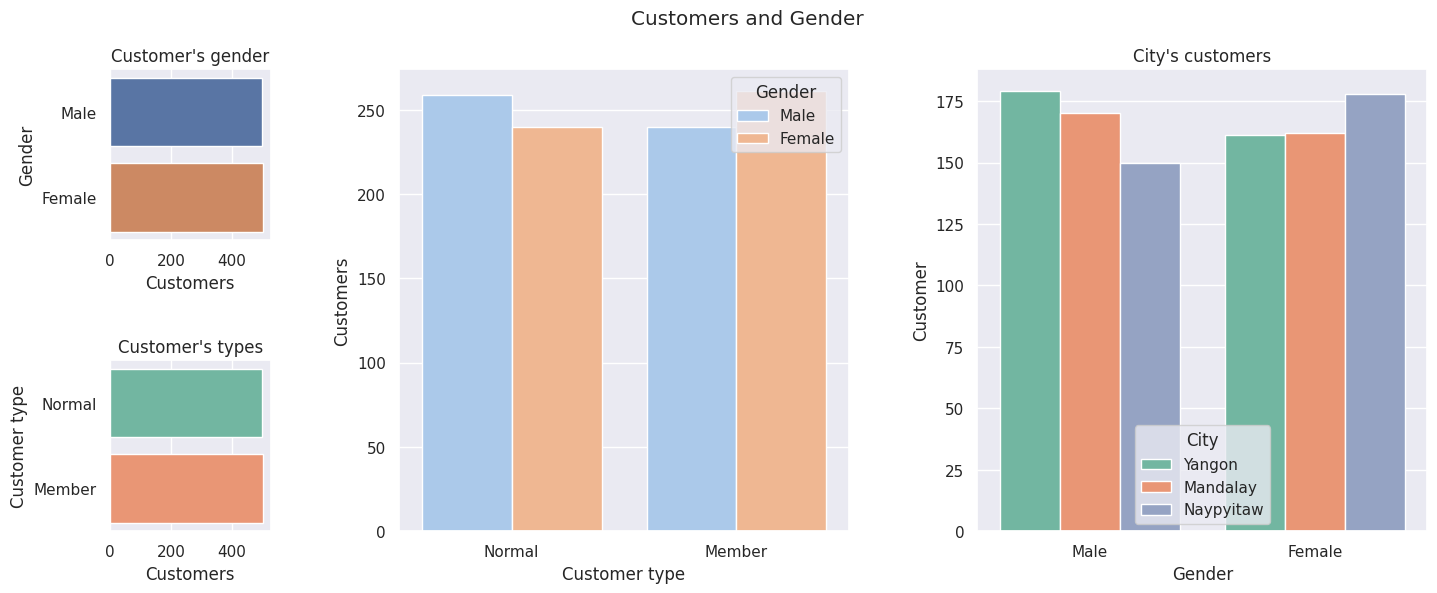

In [ ]:
fig1=plt.figure(figsize=(17,6))
grid=plt.GridSpec(2,5,hspace=0.7,wspace=0.8)


sns.countplot(sales,y='Gender',ax=fig1.add_subplot(grid[0,0])).set(xlabel='Customers',title="Customer's gender")
sns.countplot(sales,y='Customer type',palette=sns.color_palette('Set2'),ax=fig1.add_subplot(grid[1,0])).set(xlabel='Customers',title="Customer's types")
sns.countplot(sales,x='Customer type',hue='Gender',ax=fig1.add_subplot(grid[:,1:3]),palette='pastel').set(ylabel='Customers')
sns.countplot(sales,x='Gender',hue='City',ax=fig1.add_subplot(grid[:,3:]),palette=sns.color_palette('Set2')).set(ylabel='Customer',title="City's customers")
plt.suptitle('Customers and Gender')

[Text(0.5, 1.0, "Customer's payment")]

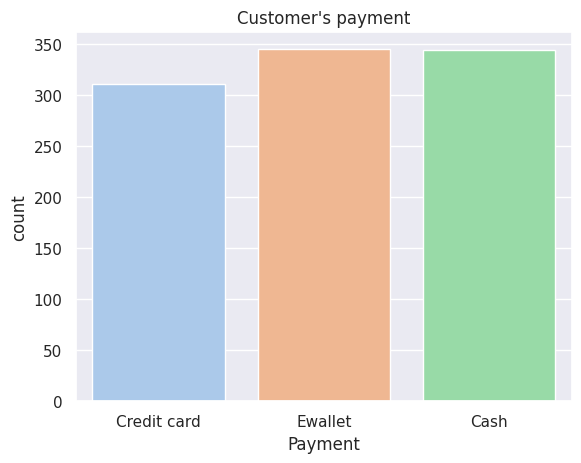

In [ ]:
sns.countplot(sales,x='Payment',palette='pastel').set(title="Customer's payment")

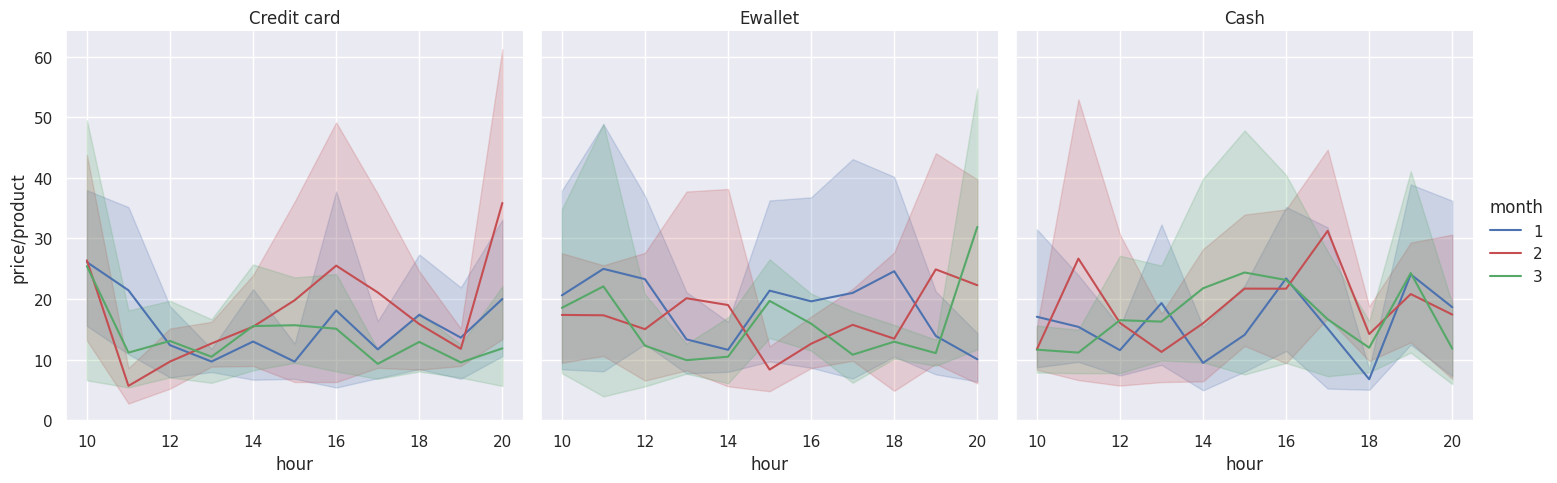

In [ ]:
sns.relplot(data=sales,x='hour',hue='month',col='Payment',kind='line',y='price/product',palette=['b','r','g']).set_titles('{col_name}')

Text(0.5, 1.0, 'Customers rate')

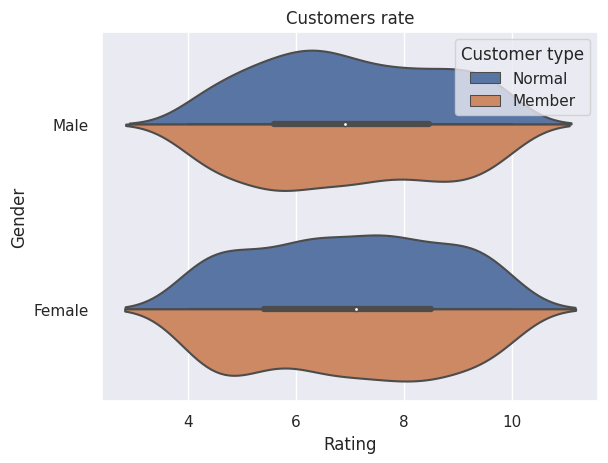

In [ ]:
sns.violinplot(sales,x='Rating',y='Gender',hue='Customer type',split=True).set_title('Customers rate')

## Xem tài chính, buôn bán thế nào

Text(0.5, 0.98, 'Quantity and Total with time')

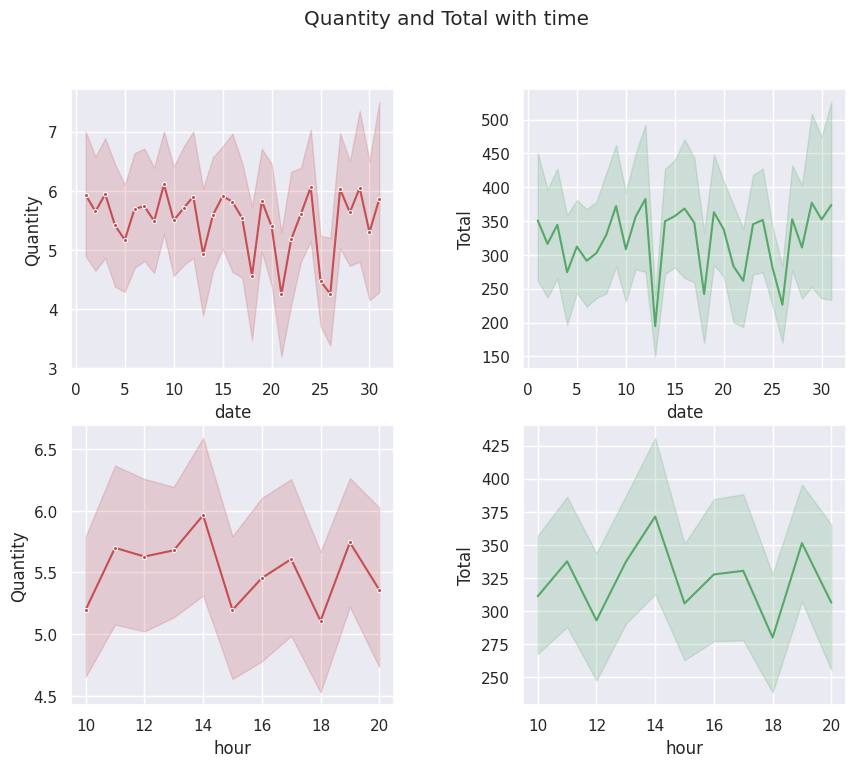

In [ ]:
fig3,ax3 = plt.subplots(2,2,figsize=(10,8))
fig3.subplots_adjust(wspace=0.4,hspace=0.2)

sns.lineplot(sales,x='date',y='Quantity',color='r',marker='.',ax=ax3[0,0])
sns.lineplot(sales,x='date',y='Total',color='g',ax=ax3[0,1])
sns.lineplot(sales,x='hour',y='Quantity',color='r',marker='.',ax=ax3[1,0])
sns.lineplot(sales,x='hour',y='Total',color='g',ax=ax3[1,1])

plt.suptitle('Quantity and Total with time')

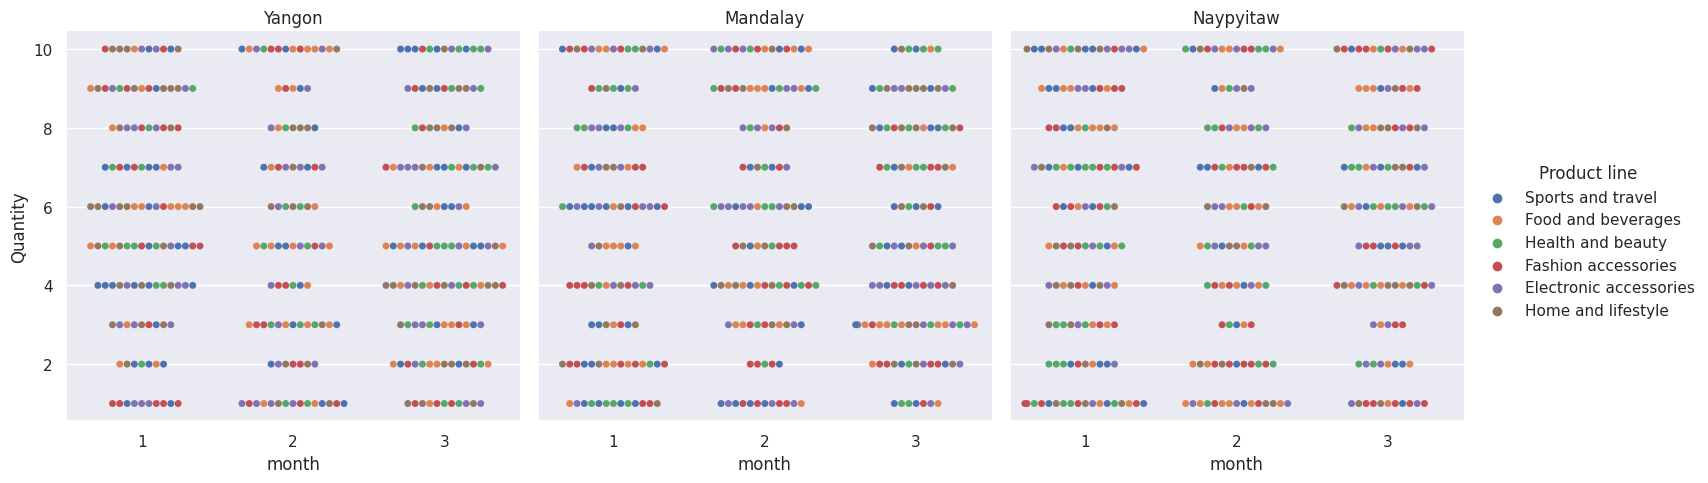

In [ ]:
sns.catplot(sales,x='month',y='Quantity',col='City',kind='swarm',hue='Product line').set_titles('{col_name}')

<Axes: xlabel='price/product', ylabel='Quantity'>

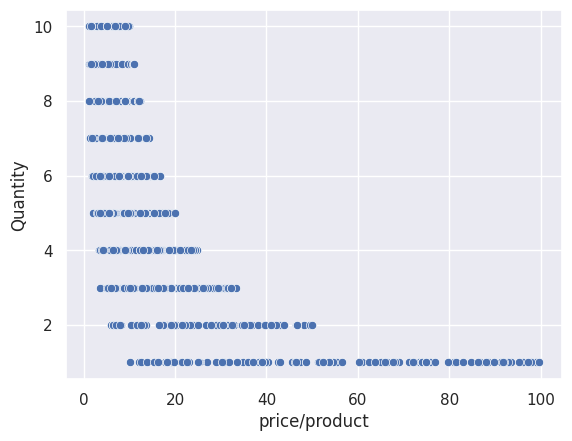

In [ ]:
sns.scatterplot(sales,x='price/product',y='Quantity',)

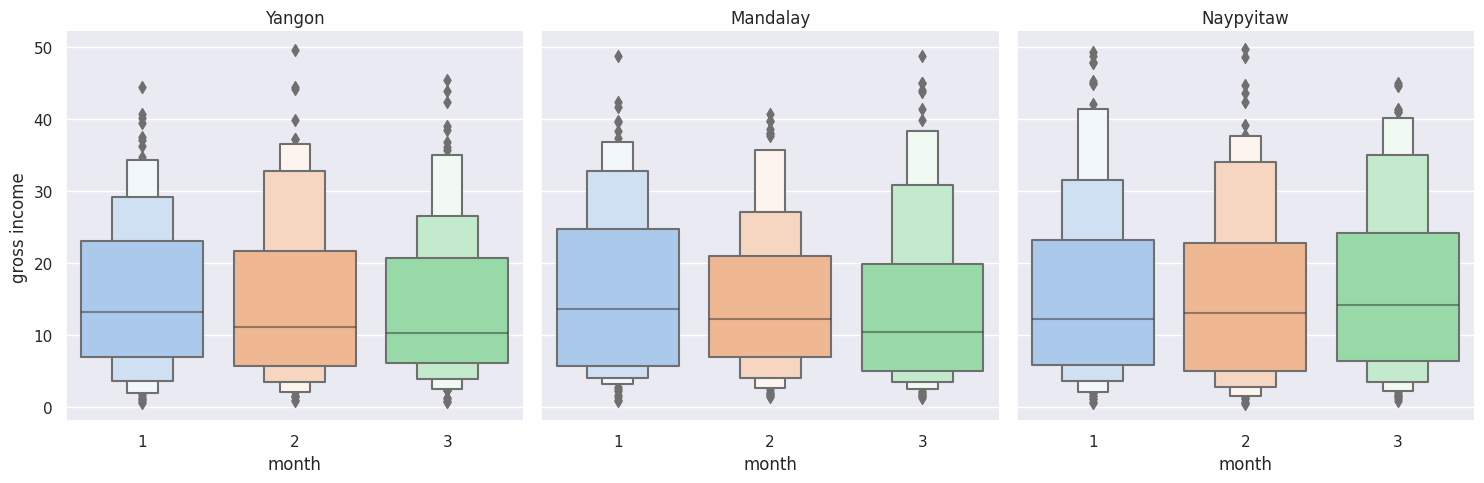

In [ ]:
sns.catplot(sales,x='month',y='gross income',kind='boxen',col='City',palette='pastel').set_titles('{col_name}')

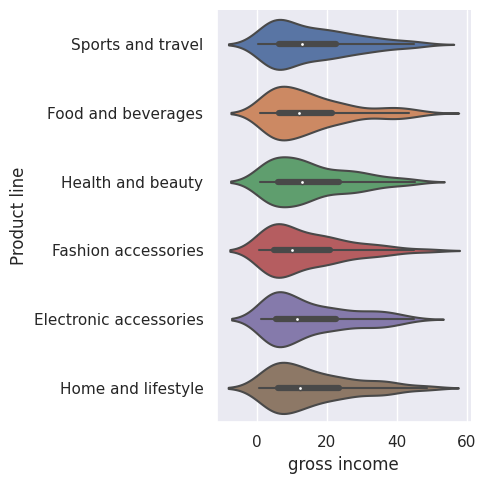

In [ ]:
sns.catplot(sales,y='Product line',x='gross income',kind='violin')